In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [35]:
data = pd.read_csv('./train.csv')



In [36]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


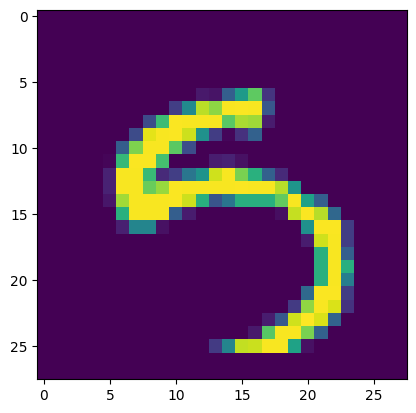

In [37]:
data = np.array(data)
m, n = data.shape 
# shuffle to randomise between dev (test)
np.random.shuffle(data)
# Reshape and show an example data entry - what we're trying to work back to! 
image_example = np.reshape(data[0][1:], shape=(28,28))
plt.imshow(image_example)


In [39]:
# Split up the training data between dev, and train. 
# turn each row into a column using transpose

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_,m_train = X_train.shape

In [14]:
X_train[:,0].shape

(784,)

In [49]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2


def ReLU(Z):
    return np.maximum(Z,0)


def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2

    A2 = softmax(Z2)
    return Z1, A1, Z2, A2



In [50]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2,X, W2, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2
# def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
#     one_hot_Y = one_hot(Y)
#     dZ2 = A2 - one_hot_Y
#     dW2 = 1 / m * dZ2.dot(A1.T)
#     db2 = 1 / m * np.sum(dZ2)
#     dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
#     dW1 = 1 / m * dZ1.dot(X.T)
#     db1 = 1 / m * np.sum(dZ1)
#     return dW1, db1, dW2, db2

def deriv_ReLU(Z):
    return Z > 0


def update_params(W1, b1, W2, b2,dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    W1 = W1 - alpha * dW1
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [51]:

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X,Y,iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, X, W2, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print('Iteration: ', i)
            print('Accuracy: ', get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [53]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 301, 0.1)

Iteration:  0
[9 1 1 ... 9 1 1] [1 8 7 ... 3 2 2]
Accuracy:  0.06560975609756098
Iteration:  50
[1 8 7 ... 3 2 1] [1 8 7 ... 3 2 2]
Accuracy:  0.43678048780487805
Iteration:  100
[1 8 7 ... 3 2 0] [1 8 7 ... 3 2 2]
Accuracy:  0.6253414634146341
Iteration:  150
[1 8 7 ... 3 2 2] [1 8 7 ... 3 2 2]
Accuracy:  0.7086341463414634
Iteration:  200
[1 8 7 ... 3 2 2] [1 8 7 ... 3 2 2]
Accuracy:  0.7594878048780488
Iteration:  250
[1 8 7 ... 3 2 2] [1 8 7 ... 3 2 2]
Accuracy:  0.7894634146341464
Iteration:  300
[1 8 7 ... 3 2 2] [1 8 7 ... 3 2 2]
Accuracy:  0.8099756097560976


In [54]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


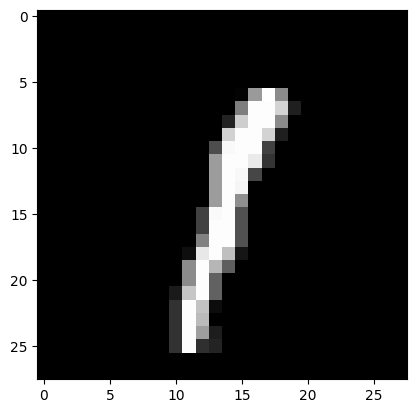

Prediction:  [8]
Label:  8


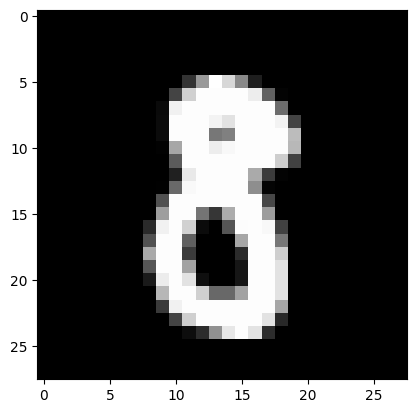

Prediction:  [7]
Label:  7


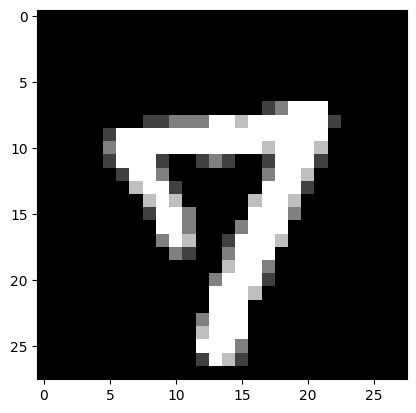

Prediction:  [0]
Label:  0


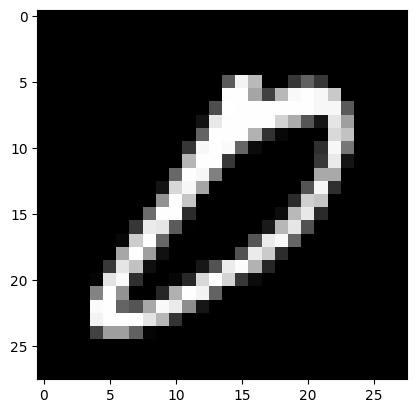

In [55]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)